# Using analagous interface to qutips mesolve

In [2]:
import qutip as q
from spylind import spylind as spl
import sympy as sm
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Qubit dynamics

## Single uniformly driven qubit

### Qutip version

In [26]:
#def qubit_integrate(epsilon, delta, g1, g2, solver):
epsilon = 0.0 * 2 * np.pi   # cavity frequency
delta   = 1.0 * 2 * np.pi   # atom frequency
g2 = 0.15
g1 = 0.0

# intial state
psi0 = q.basis(2,0)
H = epsilon / 2.0 * q.sigmaz() + delta / 2.0 * q.sigmax()
# collapse operators
c_ops = []
if g1 > 0.0:
    c_ops.append(np.sqrt(g1) * q.sigmam())
if g2 > 0.0:
    c_ops.append(np.sqrt(g2) * q.sigmaz())

e_ops = [q.sigmax(), q.sigmay(), q.sigmaz()]
tlist = np.linspace(0,2,100)
output = q.mesolve(H, psi0, tlist, c_ops, e_ops) 

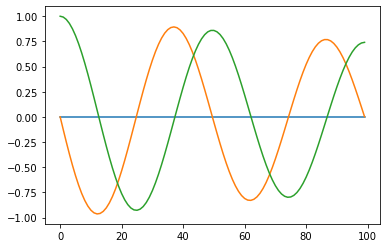

In [27]:
plt.plot(np.array(output.expect).T )

In [29]:

#output = spl.mesolve([(sm.symbols('H_0'),H) ], psi0, tlist, c_ops, e_ops) 
output = spl.mesolve([H] , psi0, tlist=tlist, c_ops = c_ops, e_ops=e_ops ) 

No pretty printing stuff (probably because no Pandas)
makeMESymb enter
Munch({'tSym': t, 'dimSyms': [], 'prop_state_syms': [\rho_{0|0}, \rho_{1|1}, \rho_{0|1}], 'stationary_state_syms': [], 'driving_syms': [], 'state_dep_syms': []})
state dependent functions should have signature [t, \rho_{0|0}, \rho_{1|1}, \rho_{0|1}]


/home/morgan/anaconda3/envs/spylind/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


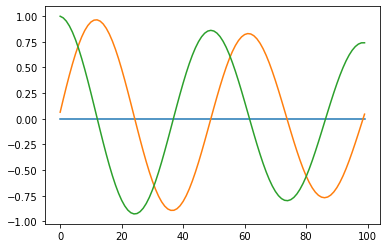

In [30]:
plt.plot(tlist, output)
plt.legend()

### Inhomogeneously broadened ensemble of qubits

In [7]:
output = spl.mesolve([H] , psi0, tlist=tlist, c_ops = c_ops, e_ops=e_ops ) 

False

In [30]:
psi0.data.todense()

matrix([[1.+0.j],
        [0.+0.j]])

## Time dependent driving of qubit

In [41]:
#def qubit_integrate(epsilon, delta, g1, g2, solver):
epsilon = 0.0 * 2 * np.pi   # cavity frequency
g2 = 0.15
g1 = 0.0

# intial state
psi0 = q.basis(2,0)
H0 = [epsilon / 2.0 * q.sigmaz(), lambda t,args: 1 ]
H1  = [q.sigmax(), lambda t, args: 5*np.sqrt(t)  ]

# collapse operators
c_ops = []
if g1 > 0.0:
    c_ops.append(np.sqrt(g1) * q.sigmam())
if g2 > 0.0:
    c_ops.append(np.sqrt(g2) * q.sigmaz())

e_ops = [q.sigmax(), q.sigmay(), q.sigmaz()]
tlist = np.linspace(0,2,100)
output = q.mesolve([H0,H1], psi0, tlist, c_ops, e_ops) 

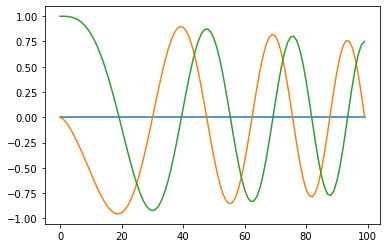

In [42]:
plt.plot(np.array(output.expect).T)

In [46]:
Esym = sm.symbols('E')
H0 = [epsilon / 2.0 * q.sigmaz() ]
H1  = [Esym, q.sigmax()]
output = spl.mesolve([H0,H1], psi0, tlist, c_ops, e_ops, t_dep_fL = {Esym: lambda t: 5*np.sqrt(t)}) 

makeMESymb enter


SympifyError: Sympify of expression 'could not parse 'Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = TrueQobj data =[[0. 0.] [0. 0.]]'' failed, because of exception being raised:
SyntaxError: invalid syntax (<string>, line 1)